In [35]:
#For extracting PCA components from selected villages
import pandas as pd
import sklearn
import sklearn.decomposition
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
#Load the csvfile
data = pd.read_csv('justNewFile',dtype={'state-code':str,'district-code':str, 'teh-code':str,'vill-code':str,'ward-no':str,'village-id':str})

In [29]:
data.head(2)

,Unnamed: 0,state-code,state,district-code,district-name,teh-code,teh-name,vill-code,ward-no,area-name,...,transport-cycle,transport-motorized,no-assets,banking-services-availability,cook-fuel-natural,cook-fuel-processed,no-cooking,bathroom-within,bathroom-outside,village-id
0,6,19,WEST BENGAL,327,Darjiling,02154,Darjeeling Pulbazar,306145,0000,Singalila Forest,...,0.0,0.0,37.3,25.5,100.0,0.0,0.0,38.5,61.5,1932702154306145
1,7,19,WEST BENGAL,327,Darjiling,02154,Darjeeling Pulbazar,306146,0000,Rimbick,...,0.7,1.8,28.1,53.6,83.5,16.4,0.1,51.2,48.8,1932702154306146


In [30]:
data.describe()

,Unnamed: 0,res-good,res-bad,rooms-under-3,rooms-over-3,household-size-under-5,household-size-over-5,owned,not-owned,water-treated,...,has-phone,transport-cycle,transport-motorized,no-assets,banking-services-availability,cook-fuel-natural,cook-fuel-processed,no-cooking,bathroom-within,bathroom-outside
count,36889.000000,36889.000000,36889.000000,36889.000000,36889.000000,36889.000000,36889.000000,36889.000000,36889.000000,36889.000000,...,36889.000000,36889.000000,36889.000000,36889.000000,36889.00000,36889.000000,36889.000000,36889.000000,36889.000000,36889.000000
mean,1653.763588,32.915677,12.979265,88.942929,11.056215,55.895242,44.104118,96.720987,3.278771,25.240161,...,35.922446,64.032034,7.132354,25.326799,41.51254,96.641039,3.169801,0.188943,15.727539,84.272653
std,1572.981654,25.250611,14.317890,11.721506,11.721812,11.405772,11.405637,8.167352,8.167371,33.385977,...,19.964299,21.522248,7.312026,17.586108,29.27821,7.370984,7.265591,0.967669,17.984686,17.984328
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,592.000000,12.600000,2.500000,84.900000,3.200000,49.000000,36.600000,96.800000,0.000000,0.300000,...,21.700000,51.100000,2.500000,12.300000,17.00000,96.600000,0.000000,0.000000,2.100000,76.300000
50%,1207.000000,28.600000,8.800000,92.100000,7.900000,56.800000,43.200000,98.800000,1.200000,5.600000,...,34.600000,67.000000,5.400000,22.100000,36.10000,99.100000,0.700000,0.000000,9.300000,90.700000
75%,2091.000000,47.800000,18.400000,96.800000,15.100000,63.400000,51.000000,100.000000,3.200000,43.100000,...,48.600000,80.400000,9.600000,35.000000,63.00000,100.000000,3.100000,0.100000,23.700000,97.900000
max,7431.000000,100.000000,100.000000,100.100000,100.000000,100.100000,100.000000,100.000000,100.000000,100.100000,...,100.000000,100.000000,200.000000,100.000000,100.00000,100.100000,100.000000,100.000000,100.000000,100.000000


In [76]:
data.shape

(36889, 37)

In [31]:
data.columns

Index([u'Unnamed: 0', u'state-code', u'state', u'district-code',
       u'district-name', u'teh-code', u'teh-name', u'vill-code', u'ward-no',
       u'area-name', u'rural/urban', u'res-good', u'res-bad', u'rooms-under-3',
       u'rooms-over-3', u'household-size-under-5', u'household-size-over-5',
       u'owned', u'not-owned', u'water-treated', u'water-untreated',
       u'water-natural', u'electric-like', u'oil-like', u'no-lighting',
       u'electronics', u'has-phone', u'transport-cycle',
       u'transport-motorized', u'no-assets', u'banking-services-availability',
       u'cook-fuel-natural', u'cook-fuel-processed', u'no-cooking',
       u'bathroom-within', u'bathroom-outside', u'village-id'],
      dtype='object')

In [32]:
f_cols1=['res-good','water-treated','electric-like','electronics']
X=data[f_cols1]

In [33]:
X.shape

(36889, 4)

In [37]:
pca=sklearn.decomposition.PCA()

In [38]:
X_PCA=pca.fit_transform(X)

In [39]:
pca.explained_variance_ratio_

array([ 0.40799544,  0.31190872,  0.16461163,  0.11548422])

In [57]:
X_PCA[:10,:2]
np.savetxt('please.csv',X_PCA,delimiter=",")

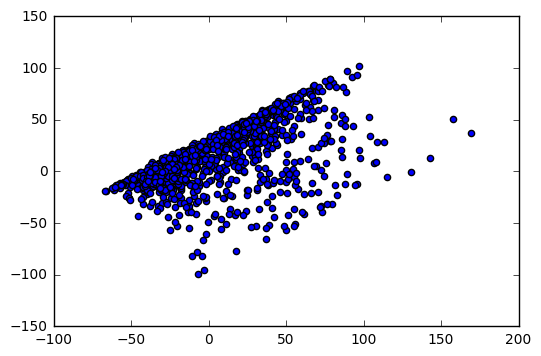

In [52]:
plt.scatter(X_PCA[:1000,0],X_PCA[:1000,1])

In [92]:
#Make a new data frame
new=pd.DataFrame(data['village-id'],copy=False)

In [93]:
new.shape

(36893, 1)

In [100]:
new.tail()

,village-id
36884,1934502494347129
36885,1934502494347130
36886,1934502494347131
36887,1934502494347132
36888,1934502494347133


In [99]:
new=new.ix[:36889]

In [105]:
#new.insert(1,'X1',X_PCA[:,0])
new.insert(2,'X2',X_PCA[:,1])
new.insert(3,'X3',X_PCA[:,2])
new.insert(4,'X4',X_PCA[:,3])


In [110]:
new.tail()

,village-id,X1,X2,X3,X4
36884,1934502494347129,-27.591858,-40.140755,11.414751,-6.617667
36885,1934502494347130,11.945916,-41.448562,1.449178,-10.217860
36886,1934502494347131,-38.612016,2.890756,-18.748522,-11.079964
36887,1934502494347132,-67.066648,-19.256691,6.710524,-4.189283
36888,1934502494347133,-43.783301,-2.856648,10.805646,-16.534902


In [112]:
new.to_csv('workThisTime.csv',delimiter=',')

In [147]:
def make_hist(col,bins):
    num_rows=len(data[col])
    plt.hist(data[col],bins=bins,weights=np.zeros(num_rows)+1./num_rows)
    plt.xlabel('Percentage')
    plt.ylabel('Number of villages')
    fig_name=col+'.png'
    plt.title(col)
    plt.savefig(fig_name)
    plt.show()

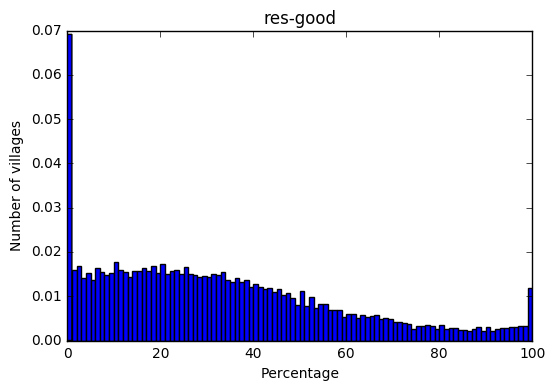

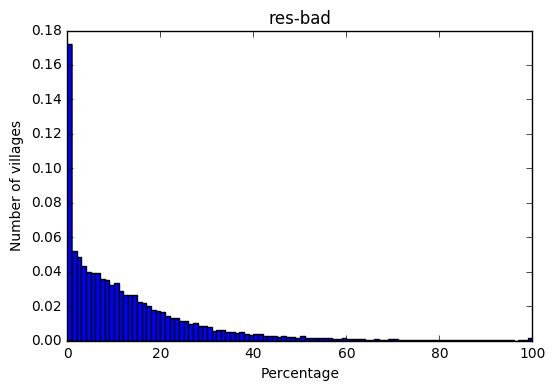

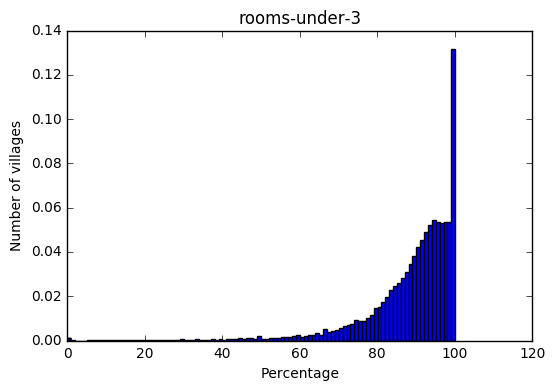

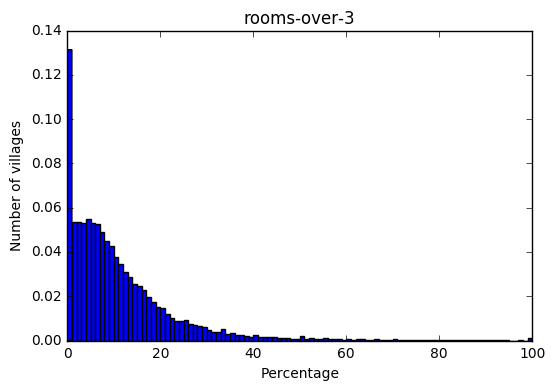

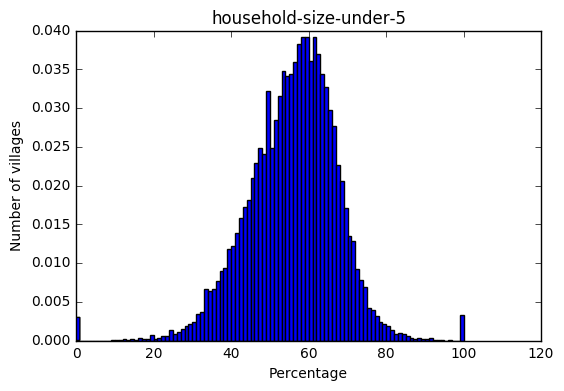

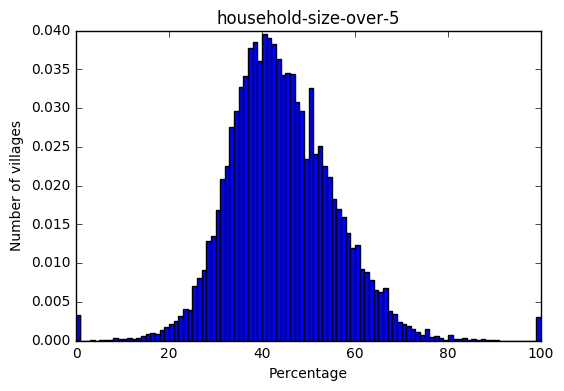

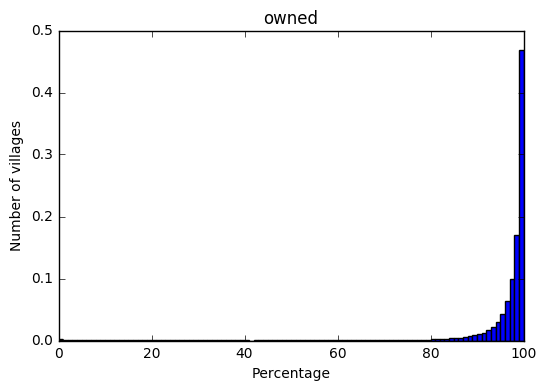

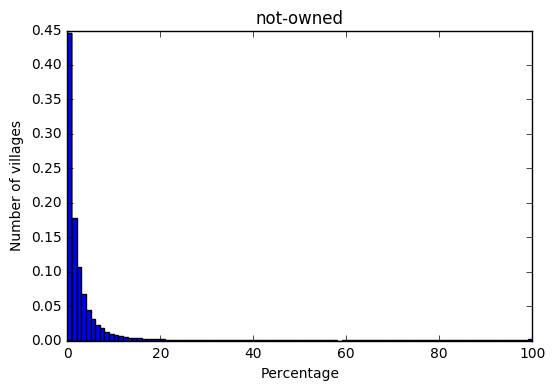

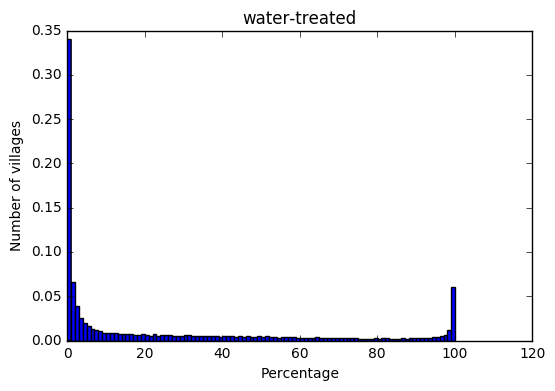

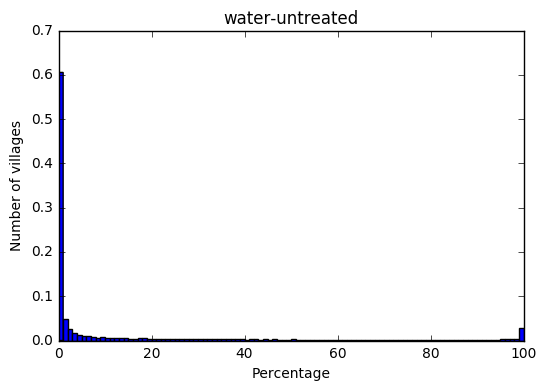

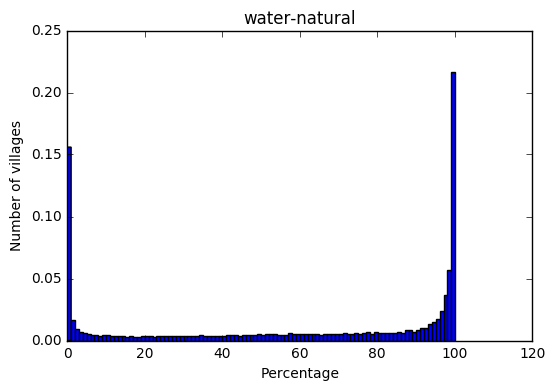

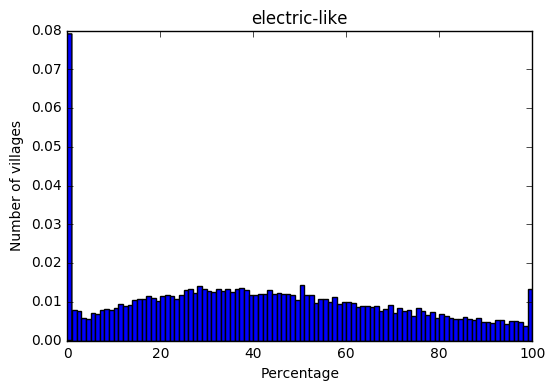

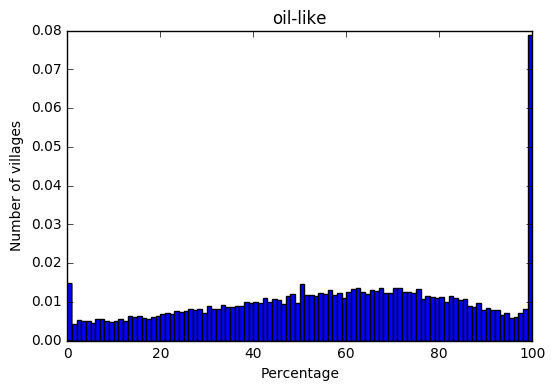

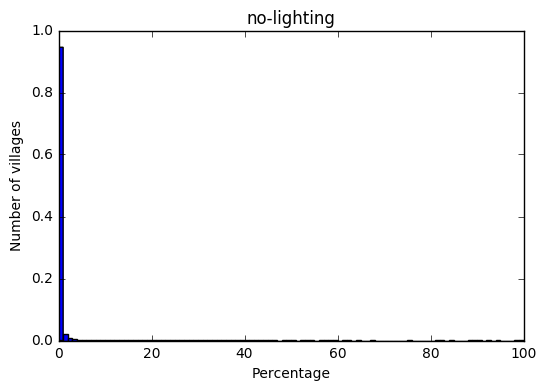

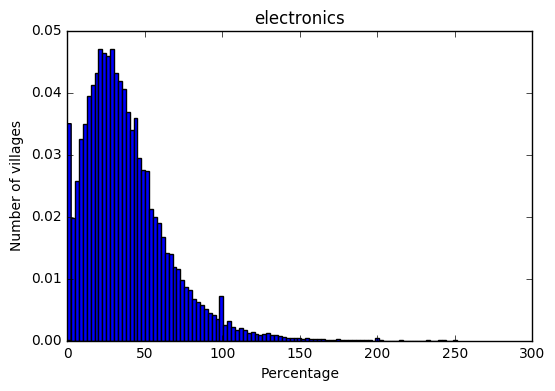

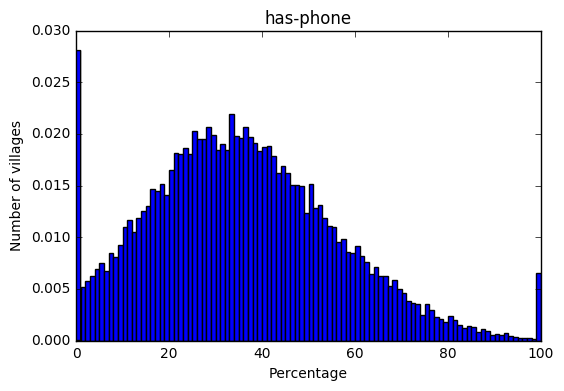

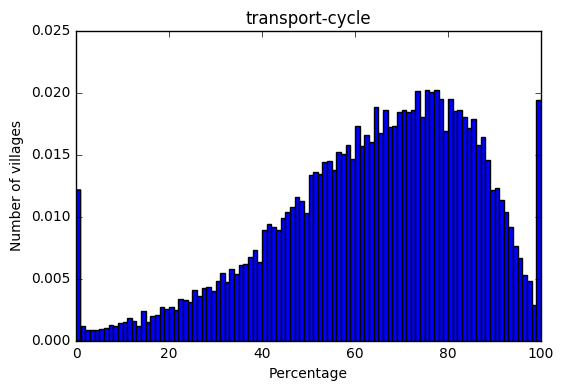

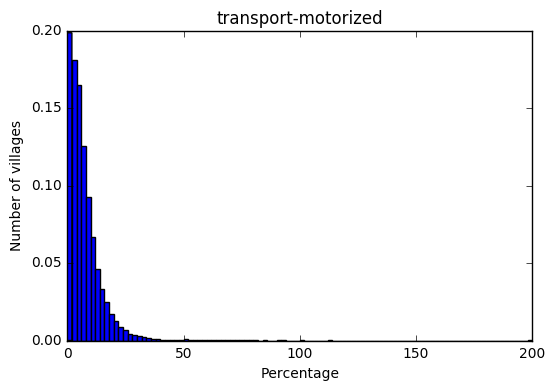

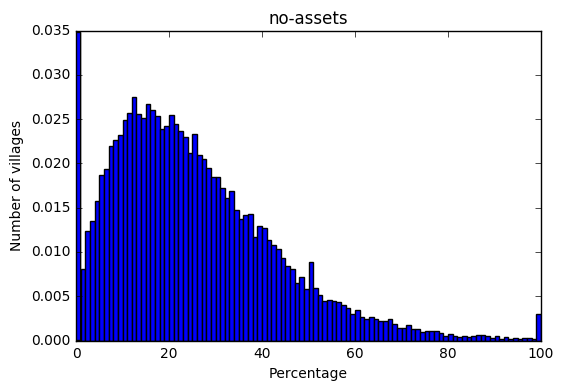

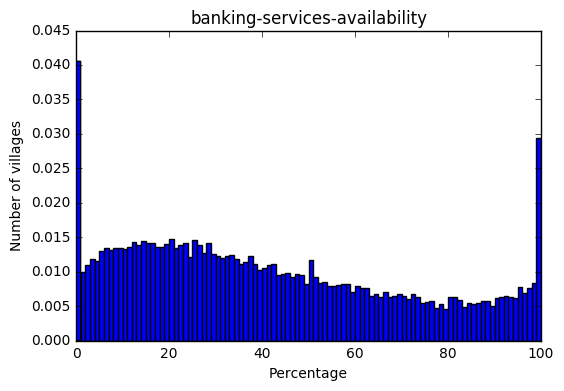

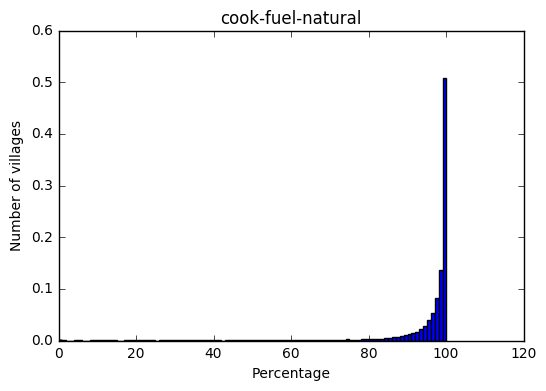

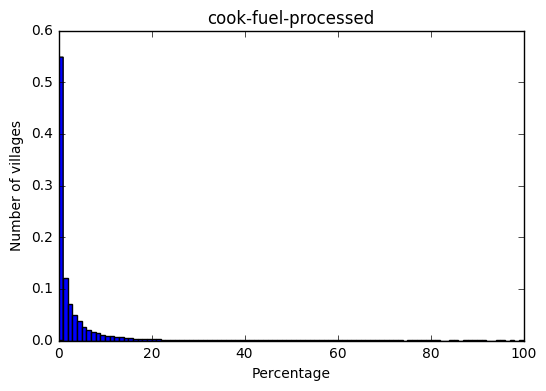

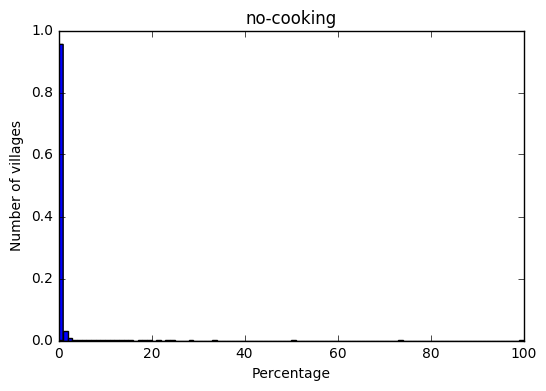

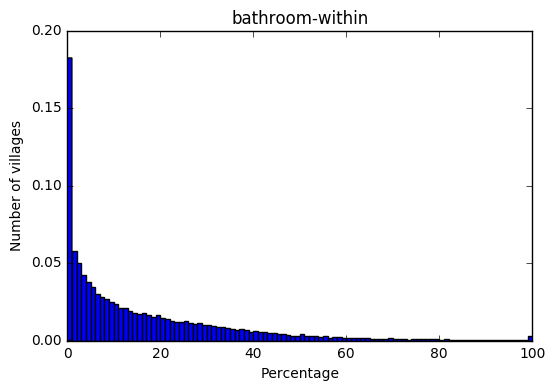

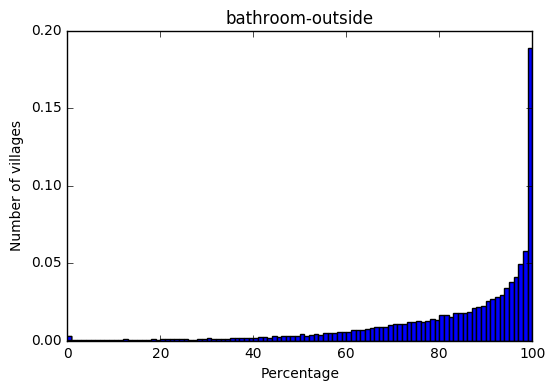

In [148]:
features = data.columns[11:-1]
for i in features:
    make_hist(i,100)